In [22]:
# 📌 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [24]:

# 🎯 2. Load Dataset
df = pd.read_csv('Mall_Customers.csv')

# 👀 Preview
print(df.head())



   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


C:\Users\DHARANIDHARAN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DHARANIDHARAN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DHARANIDHARAN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DHARANIDHARAN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known

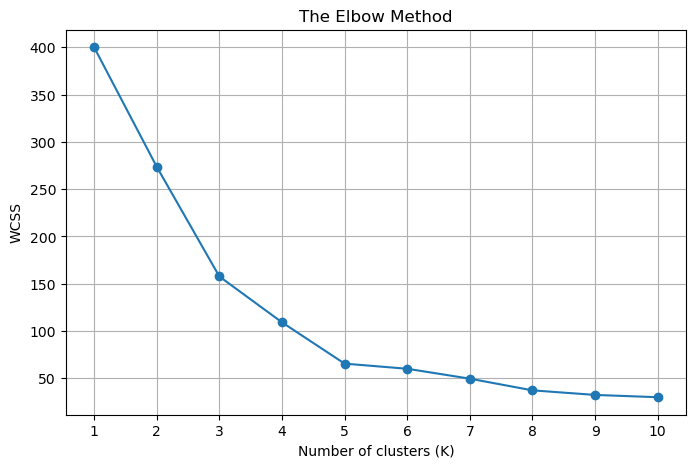

In [26]:

# 📊 3. Select Features for Clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# 🧼 4. Optional Scaling (KMeans is distance-based)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 🔍 5. Elbow Method to find optimal K
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # WCSS

# 📈 6. Plot Elbow
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


C:\Users\DHARANIDHARAN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


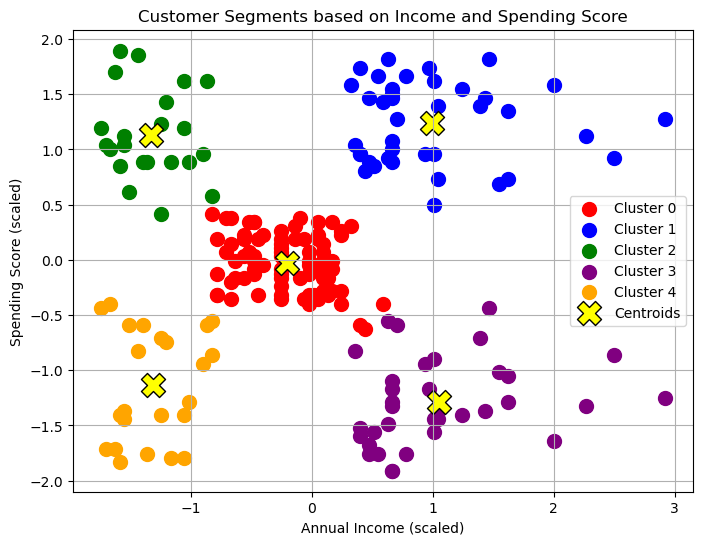

In [27]:

# ✅ 7. From Elbow we pick K=5
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# 🔖 8. Add Cluster Labels to Dataset
df['Cluster'] = y_kmeans

# 🎨 9. Visualize the Clusters
plt.figure(figsize=(8, 6))
colors = ['red', 'blue', 'green', 'purple', 'orange']
for i in range(5):
    plt.scatter(X_scaled[y_kmeans == i, 0], X_scaled[y_kmeans == i, 1],
                s=100, c=colors[i], label=f'Cluster {i}')
    
# Plotting Centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='yellow', label='Centroids', edgecolors='black', marker='X')

plt.title('Customer Segments based on Income and Spending Score')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.legend()
plt.grid(True)
plt.show()


In [28]:

# 📦 10. Optional - Analyze Cluster Characteristics
cluster_summary = df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()
print("\nCluster Averages:")
print(cluster_summary)


Cluster Averages:
         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 55.296296               49.518519
1                 86.538462               82.128205
2                 25.727273               79.363636
3                 88.200000               17.114286
4                 26.304348               20.913043
